<a href="https://colab.research.google.com/github/r-zeeshan/self-driving-car/blob/main/Self_Driving_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone the repository

In [1]:
!git clone https://github.com/r-zeeshan/self-driving-car.git /content/sdc

Cloning into '/content/sdc'...
remote: Enumerating objects: 35659, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 35659 (delta 23), reused 27 (delta 9), pack-reused 35612
Receiving objects: 100% (35659/35659), 460.98 MiB | 16.66 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Updating files: 100% (35611/35611), done.


In [2]:
## Command to pull latest changes in the repostory, to be deleted later...
%cd /content/sdc
!git pull

/content/sdc
Already up to date.


# Step 1

In [3]:
# Import helper functions from utility
from sdc.utils import *

In [4]:
path = "/content/sdc/SimulationData/"
data = importDataInfo(path)

                               Center  \
0  center_2023_01_29_16_36_36_725.jpg   
1  center_2023_01_29_16_36_36_798.jpg   
2  center_2023_01_29_16_36_36_869.jpg   
3  center_2023_01_29_16_36_36_956.jpg   
4  center_2023_01_29_16_36_37_026.jpg   

                                                Left  \
0  C:\Users\Zeeshan\Desktop\SimulationData\IMG\le...   
1  C:\Users\Zeeshan\Desktop\SimulationData\IMG\le...   
2  C:\Users\Zeeshan\Desktop\SimulationData\IMG\le...   
3  C:\Users\Zeeshan\Desktop\SimulationData\IMG\le...   
4  C:\Users\Zeeshan\Desktop\SimulationData\IMG\le...   

                                               Right  Steering  Throttle  \
0  C:\Users\Zeeshan\Desktop\SimulationData\IMG\ri...       0.0       0.0   
1  C:\Users\Zeeshan\Desktop\SimulationData\IMG\ri...       0.0       0.0   
2  C:\Users\Zeeshan\Desktop\SimulationData\IMG\ri...       0.0       0.0   
3  C:\Users\Zeeshan\Desktop\SimulationData\IMG\ri...       0.0       0.0   
4  C:\Users\Zeeshan\Desktop\Simulati

# Step 2

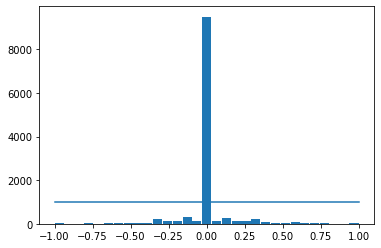

Removed Images:  8492
Remaining Images:  11869


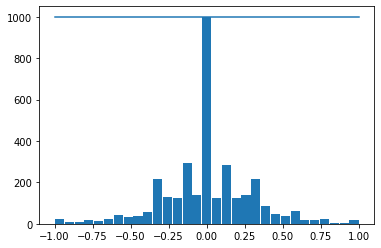

In [5]:
bData = balanceData(data)

## Step 3

In [6]:
imagesPath, steerings = loadData(path, bData)

In [7]:
print(imagesPath[0], steerings[0])

/content/sdc/SimulationData/IMG/center_2023_01_29_16_36_36_869.jpg 0.0


## Step 4

In [8]:
from sklearn.model_selection import train_test_split
# Split data into train and val sets
X_train, X_val, y_train, y_val = train_test_split(imagesPath, steerings, test_size=0.2, random_state=5)
len(X_train)

2701

In [9]:
import tensorflow as tf

In [10]:
def createModel():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(24, (5,5), (2,2), input_shape = (66, 200, 3), activation="elu"),
        tf.keras.layers.Conv2D(36, (5,5), (2,2), activation="elu"),
        tf.keras.layers.Conv2D(48, (5,5), (2,2), activation="elu"),
        tf.keras.layers.Conv2D(64, (3,3), activation="elu"),
        tf.keras.layers.Conv2D(64, (3,3), activation="elu"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation="elu"),
        tf.keras.layers.Dense(500, activation="elu"),
        tf.keras.layers.Dense(10, activation="elu"),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss="mae")

    return model

In [11]:
model = createModel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Step 9

In [12]:
history = model.fit(batchGenerator(X_train, y_train, 100, True),
          steps_per_epoch=300,
          epochs=10,
          validation_data=(batchGenerator(X_val, y_val, 100, False)),
          validation_steps=200)

Epoch 1/10
300/300 [==============================] - 138s 433ms/step - loss: 0.1950 - val_loss: 0.1792
Epoch 2/10
150/300 [==============>...............] - ETA: 48s - loss: 0.1823

KeyboardInterrupt: ignored

## Step 10

In [ ]:
model.save("model.h5")
print("Model Saved")

Model Saved


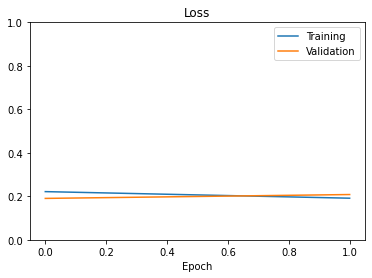

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Training", "Validation"])
plt.ylim([0,1])
plt.title("Loss")
plt.xlabel("Epoch")
plt.show()